<a href="https://colab.research.google.com/github/Msvnt/PessoasDesaparecidas/blob/main/Pessoas_desaparecidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===== Upload da planilha =====
import pandas as pd
from sklearn.linear_model import LinearRegression

# Le a planilha
df = pd.read_csv("pessoas_desaparecidas.csv")

# Conferir as primeiras linhas
df.head()


,Ano,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total,Diferenca_Absoluta,Diferenca_Percentual,Populacao,Taxa_por_100_mil_hab
0,2003,167,174,188,155,179,178,137,156,210,165,180.0,155.0,2044.0,NaN,NaN,6012069.0,34.0
1,2004,185,165,177,175,170,128,133,138,183,149,133.0,153.0,1889.0,-155.0,-7.6,6057933.0,31.2
2,2005,177,119,157,127,147,142,126,157,118,185,124.0,153.0,1732.0,-157.0,-8.3,6104147.0,28.4
3,2006,178,148,150,165,136,136,139,148,145,165,122.0,160.0,1792.0,60.0,3.5,6150714.0,29.1
4,2007,162,139,176,160,140,187,170,162,146,150,133.0,133.0,1858.0,66.0,3.7,6197637.0,30.0


Inclinação (média de variação por ano): 3.4545454545454537
Intercepto: -4814.952380952379
Equação: Total = -4814.95 + 3.45 * Ano


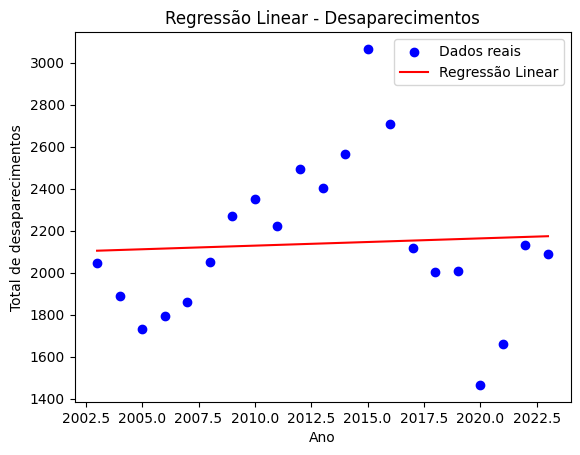

In [ ]:
# ===== Regressão Linear =====

X = df["Ano"].values.reshape(-1, 1)   # variável independente (anos)
y = df["Total"].values               # variável dependente (desaparecimentos)

# Criar modelo
modelo = LinearRegression()
modelo.fit(X, y) # Treina o modelo de regressão usando os "Ano" (X) para prever o "Total" de desaparecimentos (y)

# Previsão
y_pred = modelo.predict(X)

# Mostrar equação
print("Inclinação (média de variação por ano):", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)
print(f"Equação: Total = {modelo.intercept_:.2f} + {modelo.coef_[0]:.2f} * Ano")

# Gráfico
plt.scatter(X, y, color="blue", label="Dados reais")
plt.plot(X, y_pred, color="red", label="Regressão Linear")
plt.xlabel("Ano")
plt.ylabel("Total de desaparecimentos")
plt.title("Regressão Linear - Desaparecimentos")
plt.legend()
plt.show()


*usamos a biblioteca Matplotlib para criar um gráfico de dispersão dos dados reais e sobrepor a linha de regressão linear prevista.(plt.scatter,...,etc)*

Em resumo, a regressão linear sugere que, embora haja flutuações anuais, a tendência geral é de um ligeiro aumento no número total de desaparecimentos por ano, de acordo com os dados fornecidos. É importante lembrar que este é um modelo linear simples e pode não capturar todas as complexidades dos dados.

Portanto, ao analisar a regressão linear do "Ano" versus "Total de desaparecimentos", podemos aprender sobre a tendência temporal, mas também percebemos que outros fatores, como a população, podem ser mais influentes e merecem ser investigados em análises futuras para obter uma compreensão mais completa.

In [ ]:
# Somatório de desaparecimentos por mês em todo o período
meses = df[["Jan","Fev","Mar","Abr","Mai","Jun","Jul","Ago","Set","Out","Nov","Dez"]].sum() #soma as colunas mes

# frequencia absolut
freq_absoluta = meses

# Freq relativa (%)
freq_relativa = (meses / meses.sum()) * 100

# monta em uma tabela
tabela_frequencia = pd.DataFrame({
    "Frequência Absoluta": freq_absoluta,
    "Frequência Relativa (%)": freq_relativa.round(2)
})

tabela_frequencia

,Frequência Absoluta,Frequência Relativa (%)
Jan,4203.0,9.36
Fev,3674.0,8.18
Mar,3996.0,8.90
Abr,3618.0,8.05
Mai,3557.0,7.92
Jun,3566.0,7.94
Jul,3492.0,7.77
Ago,3746.0,8.34
Set,3795.0,8.45
Out,4060.0,9.04


A **frequência absoluta** mostra o número total de desaparecimentos registrados para cada mês ao longo de todos os anos presentes no conjunto de dados.

Por exemplo:

*   Jan (Janeiro): Foram registrados 4203 desaparecimentos no total, somando todos os meses de janeiro de todos os anos.
*   Fev (Fevereiro): Foram registrados 3674 desaparecimentos no total, somando todos os meses de fevereiro de todos os anos.


E assim por diante para cada um dos meses listados na tabela. É a contagem bruta de quantos desaparecimentos ocorreram em cada mês durante todo o período coberto pelos dados.

Ja a **frequência relativa** (%) mostra a proporção de desaparecimentos que ocorreram em cada mês em relação ao total geral de desaparecimentos em todos os meses e anos no conjunto de dados. É apresentada como uma porcentagem.

Por exemplo:

*   Jan (Janeiro): Representa 9.36% do total de desaparecimentos registrados em todo o período. Isso significa que, de todos os desaparecimentos, 9.36% aconteceram nos meses de janeiro de todos os anos somados.
*   Fev (Fevereiro): Representa 8.18% do total de desaparecimentos.

A frequência relativa nos ajuda a ver a importância de cada mês em termos de desaparecimentos em comparação com os outros meses, mostrando quais meses têm uma proporção maior ou menor de ocorrências. A soma de todas as frequências relativas deve ser aproximadamente 100%.